# Session 5 - Homework ANGGORO Fajar Tri

## Exercise 1 Chapter 9

This problem involves hyperplanes in two dimensions.

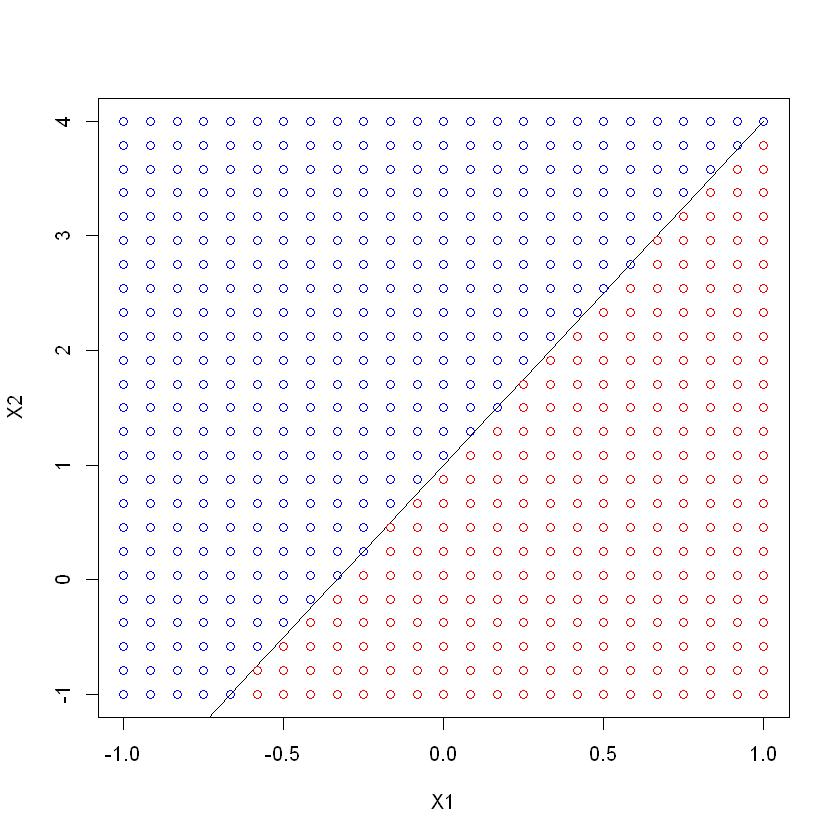

In [2]:
# 1a)  Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points
# for which 1 + 3X1 − X2 < 0.

X1 = seq(-1,1,0.1)
plot(X1, 1+3*X1, xlab='X1',ylab='X2',type='l',xlim=c(-1,1),ylim=c(-1,4))

# define separation
for(i in seq(-1,1,length.out = 25)){
  pts=data.frame(rep(i,25),seq(-1,4,length.out = 25))
  points(pts,col=ifelse(1+3*pts[,1]-pts[,2]>0,'red','blue'))
}

# Colored in blue: 1 + 3X1 - X2 <= 0
# Red: The otherwise

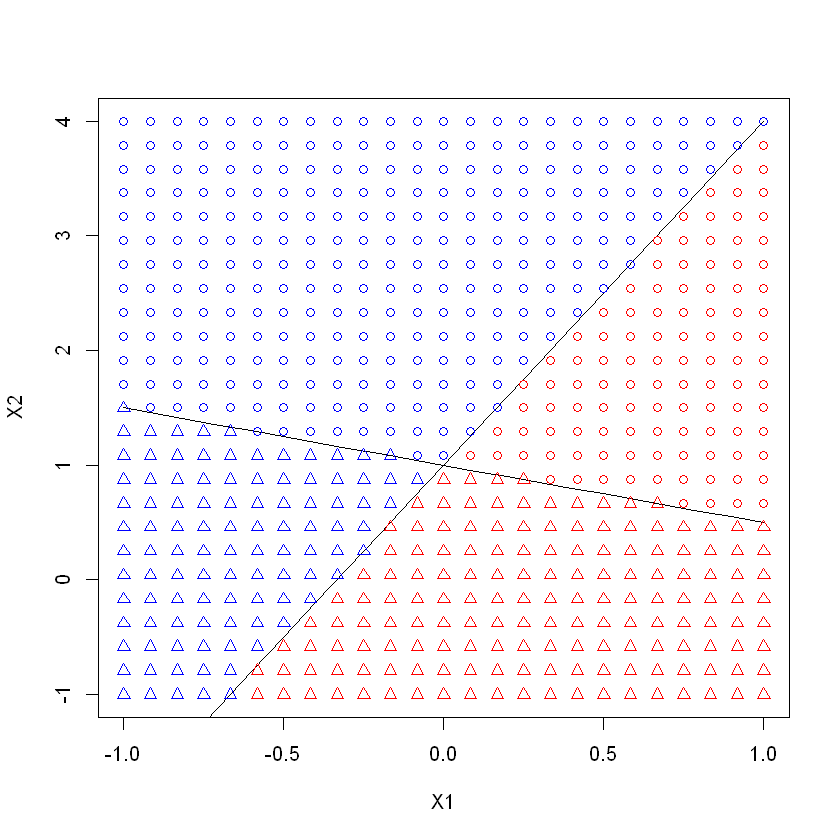

In [4]:
# 1b)  On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0. Indicate the set of points for which −2 + X1 + 2X2 > 0, as well
# as the set of points for which −2 + X1 + 2X2 < 0.

X1 = seq(-1,1,0.1)
plot(X1,1+3*X1,xlab='X1',ylab='X2',type='l',xlim=c(-1,1),ylim=c(-1,4))
lines(X1, 1-1/2*X1)

for(i in seq(-1,1,length.out = 25)){
  pts=data.frame(rep(i,25),seq(-1,4,length.out = 25))
  points(pts,col=ifelse(1+3*pts[,1]-pts[,2]>0,'red','blue'),pch=ifelse(-2+pts[,1]+2*pts[,2]>0,1,2))
}
# Triangle shaped: -2 + X1 + 2X2 < 0

## Exercise 2 Chapter 9

We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0+β1X1+β2X2 = 0. We now investigate a non-linear decision boundary.

Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"
Warning message in sqrt(4 - (1 + X1)^2):
"NaNs produced"


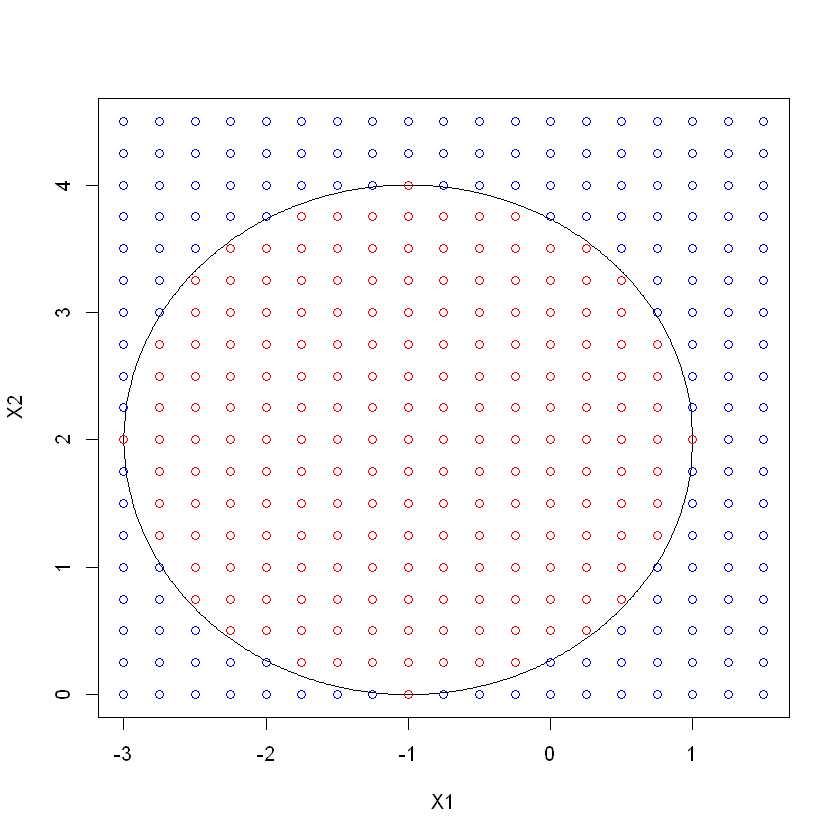

In [5]:
# a) Sketch the curve (1 + X1)^2 + (2 − X2)^2 = 4.
# b) On your sketch, indicate the set of points for which (1 + X1)^2 + (2 − X2)^2 > 4, 
# as well as the set of points for which (1 + X1)^2 + (2 − X2)^2 ≤ 4.
# c) Suppose that a classifier assigns an observation to the blue class if (1 + X1)^2 + (2 − X2)^2 > 4,
# and to the red class otherwise. To what class is the observation (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?
# d) Argue that while the decision boundary in (c) is not linear in terms of X1 and X2, it is linear in terms of X1, X1^2 , X2, and X2^2.

X1 = seq(-3,3,0.01)

X2 = 2-sqrt(4-(1+X1)^2)

plot(X1,X2,type='l',xlim=c(-3,1.5),ylim=c(0,4.5))

X2=2+sqrt(4-(1+X1)^2)

lines(X1,X2)

for(i in seq(-3,3,length.out = 25)){
  pts=data.frame(rep(i,25),seq(-1,5,length.out = 25))
  points(pts,col=ifelse( (1 + pts[,1])^2 + (2-pts[,2])^2 > 4,'blue','red'))
}

# b) the eq describes a circle at (-1, 2). colored in red: (1+X1)^2 + (2−X2)^2 >4.
# c) the points (0,0),(2,2),(3,8) : blue class, while (-1,1) : red class
# d) from the quadratic perspective, both X1^2 & X2^2 could be seen as adding another predictor, this is clearly linear.

## Exercise 4 Chapter 9

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

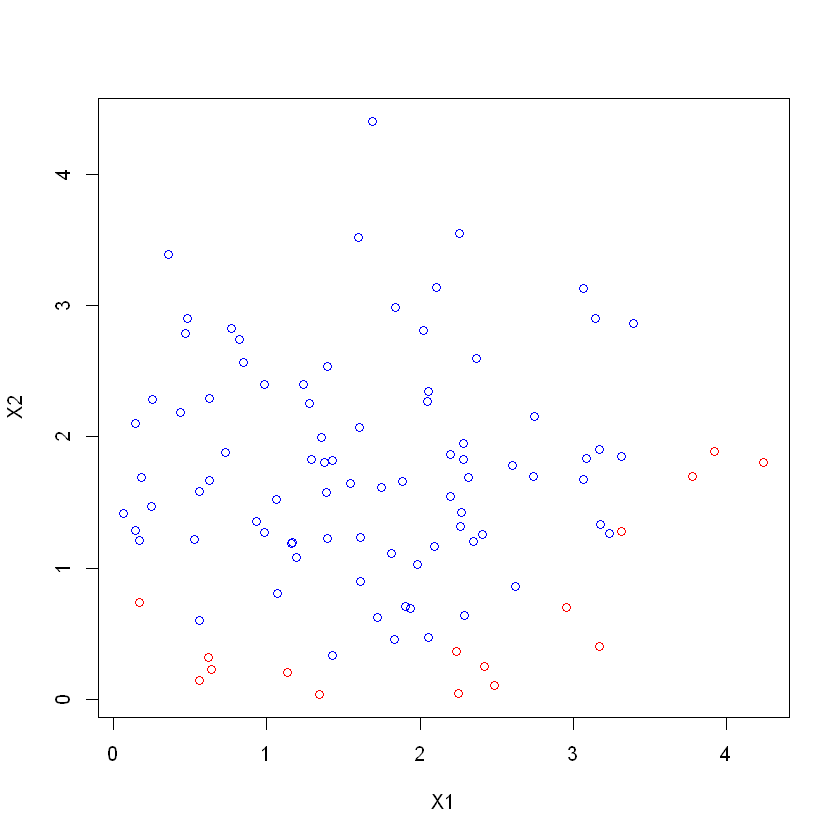

In [11]:
# generate dataset
set.seed(42)
X=data.frame(X1=abs(rnorm(100,1.5,1.2)),X2=abs(rnorm(100,1.5,1)+0.2))
pts=seq(0,5,length.out = 100)

# nonlinear decision boundary
class = ifelse(1/3*(X[,1]-3)^2+X[,1]-2-X[2]>0,'red','blue')  

plot(X,xlab='X1', ylab='X2', col=class)

In [17]:
# linear SVM
library(e1071)

# Model
svm_linear = svm(class~.,data=data.frame(X,class=as.factor(class)),kernel='linear')
summary(svm_linear)

# prediction
linear_pred = predict(svm_linear,X,type='response')
table(class, linear_pred) #12% error rate



Call:
svm(formula = class ~ ., data = data.frame(X, class = as.factor(class)), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  29

 ( 15 14 )


Number of Classes:  2 

Levels: 
 blue red




      linear_pred
class  blue red
  blue   80   4
  red     8   8

In [20]:
# try a polynomial kernel
svm_poly = svm(class~.,data=data.frame(X,class=as.factor(class)),kernel='polynomial')
summary(svm_poly)

# prediction
poly_pred = predict(svm_poly,X,type='response')
table(class, poly_pred) 
# with error rate of only 3%, clearly the polynomial performs better


Call:
svm(formula = class ~ ., data = data.frame(X, class = as.factor(class)), 
    kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 blue red




      poly_pred
class  blue red
  blue   83   1
  red     2  14

## Exercise 7 Chapter 9

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [22]:
library(ISLR)

# a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.
Auto$mpg= ifelse(Auto$mpg>median(Auto$mpg),1,0)

# b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. 
# Report the cross-validation errors associated with different values of this parameter. Comment on your results.
costs = data.frame(cost=seq(0.05,100,length.out = 15))               

# cross validation
svm_tune = tune(svm,mpg~.,data=Auto,ranges=costs,kernel='linear')  
svm_tune # best parameter for cost is around 7



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 7.189286

- best performance: 0.09897942 


In [25]:
# c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. 
# Comment on your results.

# radial kernel
params = data.frame(cost=seq(0.05,100,length.out = 5), gamma=seq(0.1,100,length.out = 5))
svm_radial = tune(svm,mpg~.,data=Auto,ranges=params,kernel='radial')
svm_radial # best cost is around 25 with gamma = 0.1 for radial svm


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
    cost gamma
 25.0375   0.1

- best performance: 0.07056774 


In [26]:
# polynomial
params = data.frame(cost=seq(0.05,100,length.out = 5),degree=seq(1,100,length.out = 5))
svm_poly = tune(svm,mpg~.,data=Auto,ranges=params,kernel='polynomial')
svm_poly # best cost is 100 & degree = 1 for polynomial SVM


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      1

- best performance: 0.0981336 


In [29]:
# d)  Make some plots to back up your assertions in (b) and (c)
plot(svm_poly$best.model, Auto, mpg ~ .)

## Exercise 8 Chapter 9

This problem involves the OJ data set which is part of the ISLR package.

In [46]:
# a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations
set.seed(42)
train=sample(1:1070,800)
test=(1:1070)[-train]

tb=c()
res=c()

# b) Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. 
# Use the summary() function to produce summary statistics, and describe the results obtained.
svm_lin = svm(Purchase~.,data=OJ, subset=train, cost=0.01, kernel='linear')
summary(svm_lin)


Call:
svm(formula = Purchase ~ ., data = OJ, cost = 0.01, kernel = "linear", 
    subset = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  432

 ( 215 217 )


Number of Classes:  2 

Levels: 
 CH MM




In [47]:
# c) What are the training and test error rates?

# train error
pred=predict(svm_lin,OJ[train,])
table(OJ[train,'Purchase'], pred)

# error
mean(OJ$Purchase[train] != pred)
res=cbind(res,'train'=mean(OJ$Purchase[train] != pred))


    pred
      CH  MM
  CH 432  60
  MM  77 231

[1] 0.17125

In [48]:
# test error
pred = predict(svm_lin,OJ[test,])
table(OJ[test,'Purchase'], pred)

# error
mean(OJ$Purchase[test] != pred)
res=cbind(res,'test'=mean(OJ$Purchase[test] != pred))

    pred
      CH  MM
  CH 142  19
  MM  25  84

[1] 0.162963

In [49]:
# d)  Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

svm_tuned = tune(svm,Purchase~.,data=OJ[train,],ranges=data.frame(cost=seq(0.01,10,25)),kernel='linear')
summary(svm_tuned)
res=cbind(res,'CV'=svm_tune$best.performance)


Error estimation of 'svm' using 10-fold cross validation: 0.1825


In [50]:
# e) Compute the training and test error rates using this new value for cost

# train
pred=predict(svm_tuned$best.model,OJ[train,])
table(OJ[train,'Purchase'],pred)

mean(OJ$Purchase[train] != pred)
res=cbind(res,'train_tuned'=mean(OJ$Purchase[train] != pred))

    pred
      CH  MM
  CH 432  60
  MM  77 231

[1] 0.17125

In [51]:
# test
pred=predict(svm_tuned$best.model,OJ[test,])
table(OJ[test,'Purchase'], pred)

mean(OJ$Purchase[test] != pred)
res=cbind(res,'test_tuned'=mean(OJ$Purchase[test] != pred))

tb=rbind(tb,res)
res=c()

    pred
      CH  MM
  CH 142  19
  MM  25  84

[1] 0.162963

In [52]:
# f)  Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.
svm_rad = svm(Purchase~.,data=OJ,subset=train,cost=0.01,kernel='radial')

# train
pred=predict(svm_rad,OJ[train,])
mean(OJ$Purchase[train] != pred)
res=cbind(res,'train'=mean(OJ$Purchase[train] != pred))

# test
pred=predict(svm_rad,OJ[test,])
mean(OJ$Purchase[test] != pred)
res=cbind(res,'test'=mean(OJ$Purchase[test] != pred))

# tuning process
svm_tuned=tune(svm,Purchase~.,data=OJ[train,],ranges=data.frame(cost=seq(0.01,10,25)))

res=cbind(res,'CV'=svm_tuned$best.performance)

# train
pred=predict(svm_tuned$best.model,OJ[train,])
mean(OJ$Purchase[train] != pred)
res=cbind(res,'train_tuned'=mean(OJ$Purchase[train] != pred))

# test
pred=predict(svm_tuned$best.model,OJ[test,])
mean(OJ$Purchase[test] != pred)
res=cbind(res,'test_tuned'=mean(OJ$Purchase[test] != pred))

tb=rbind(tb,res)
res=c()

[1] 0.385

[1] 0.4037037

[1] 0.385

[1] 0.4037037

In [54]:
# g)  Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.
svm_poly = svm(Purchase~.,data=OJ,subset=train,cost=0.01,kernel='polynomial')

# train
pred=predict(svm_poly,OJ[train,])
mean(OJ$Purchase[train] != pred)
res=cbind(res,'train'=mean(OJ$Purchase[train] != pred))

# test
pred=predict(svm_poly,OJ[test,])
mean(OJ$Purchase[test] != pred)
res=cbind(res,'test'=mean(OJ$Purchase[test] != pred))

# tuning process
svm_tuned=tune(svm,Purchase~.,data=OJ[train,],ranges=data.frame(cost=seq(0.01,10,25)), kernel='polynomial')

res=cbind(res,'CV'=svm_tuned$best.performance)

# train
pred=predict(svm_tuned$best.model,OJ[train,])
mean(OJ$Purchase[train] != pred)
res=cbind(res,'train_tuned'=mean(OJ$Purchase[train] != pred))

# test
pred=predict(svm_tuned$best.model,OJ[test,])
mean(OJ$Purchase[test] != pred)
res=cbind(res,'test_tuned'=mean(OJ$Purchase[test] != pred))

tb=rbind(tb,res)

[1] 0.36625

[1] 0.3777778

[1] 0.36625

[1] 0.3777778

In [55]:
# h) Overall, which approach seems to give the best results on this data?
rownames(tb)=c('Linear','Radial','Polynomial')
tb # Linear kernel performs best for this data set

,train,test,CV,train_tuned,test_tuned
Linear,0.17125,0.1629630,0.09897942,0.17125,0.1629630
Radial,0.38500,0.4037037,0.38500000,0.38500,0.4037037
Polynomial,0.36625,0.3777778,0.36625000,0.36625,0.3777778


### Source
https://rpubs.com/evertonjlima/242636